Movies Dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
#Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Pravalika05/Data_Analyst_Portfolio/main/Movies/tmdb-movies.csv')
df.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 10866
Number of columns: 21


In [16]:
#Statictics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
# unique values for each column
df.nunique()

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
tagline                  7997
keywords                 8804
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [18]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Data cleaning process by filling null values with mean and also drop duplicate data

In [23]:
#drop column that are not needed
columns_to_drop = ['id', 'imdb_id', 'homepage', 'overview']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)
df.drop(columns=['id', 'imdb_id', 'homepage', 'overview'], errors='ignore')




,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [24]:
# calculate sum of null value for each coloumn
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [25]:
# Drop null values for each coloumn containing null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            7032 non-null   float64
 1   budget                7032 non-null   int64  
 2   revenue               7032 non-null   int64  
 3   original_title        7032 non-null   object 
 4   cast                  7032 non-null   object 
 5   director              7032 non-null   object 
 6   tagline               7032 non-null   object 
 7   keywords              7032 non-null   object 
 8   runtime               7032 non-null   int64  
 9   genres                7032 non-null   object 
 10  production_companies  7032 non-null   object 
 11  release_date          7032 non-null   object 
 12  vote_count            7032 non-null   int64  
 13  vote_average          7032 non-null   float64
 14  release_year          7032 non-null   int64  
 15  budget_adj          

In [26]:
# to replace all the zero value in column with mean value.
df['popularity']=df['popularity'].replace(0,df['popularity'].mean())
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())
df['runtime']=df['runtime'].replace(0,df['runtime'].mean())
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())


In [27]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03
mean,0.829463,2.084426e+07,8.339878e+07,104.882895,312.684300,6.013239,1999.383817,3.484685e+07,1.074617e+08
std,1.180185,3.602117e+07,1.330625e+08,23.704753,693.182087,0.876516,13.468216,3.492787e+07,1.631156e+08
min,0.000188,0.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.693980e-01,2.861934e+00
25%,0.278573,0.000000e+00,2.824752e+07,92.000000,24.000000,5.500000,1992.000000,2.037761e+07,3.923478e+07
50%,0.506241,5.000000e+06,5.931630e+07,101.000000,73.000000,6.100000,2003.000000,2.500950e+07,7.643072e+07
75%,0.956217,2.600000e+07,5.931630e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.643072e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [28]:
# calculate sum of all duplicated value
df.duplicated().sum()

1

In [29]:
# Drop duplicate value
df.drop_duplicates(inplace=True)

In [30]:
# calculate sum of all duplicated value
df.duplicated().sum()

0

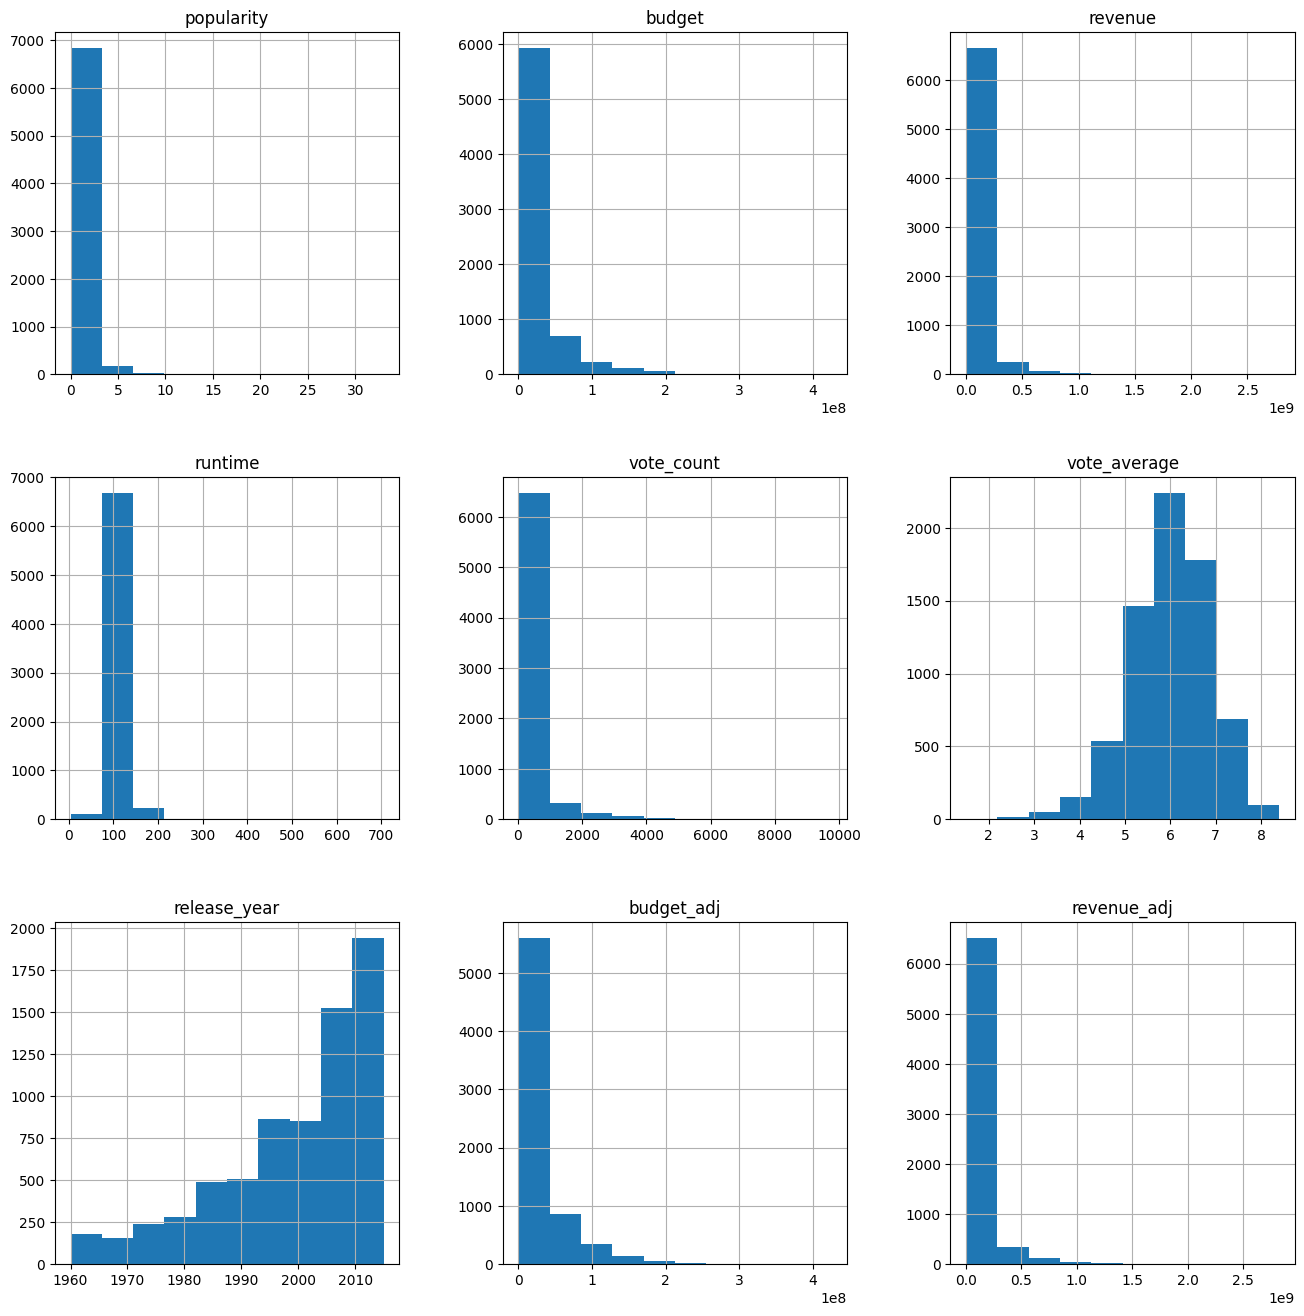

In [32]:
# visulize each variables
df.hist(figsize=(16,16));

Does higher budget mean higher popularity ?

Text(0, 0.5, 'popularity')

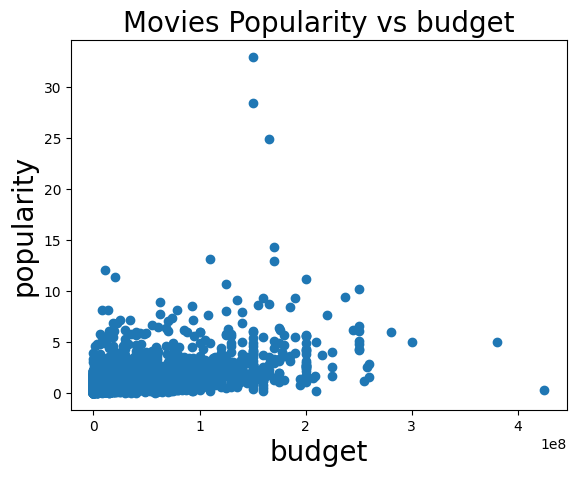

In [36]:
# plot the relation between budget and popularity
x = df['budget']
y = df['popularity']

plt.scatter(x,y)
plt.title('Movies Popularity vs budget',fontsize=20)
plt.xlabel('budget',fontsize=20)
plt.ylabel('popularity',fontsize=20)

As per the above scatter plot its very difficult to observe strong relationship between popularity and budget. So we use other
method to observe the relationship between them. In this method we divide data set into two group on the basis of median.

In [38]:
# divide the budget into two groups.
med = df['budget'].median()
lesser_cost =  df.query('budget < {}'.format(med))
more_cost =  df.query('budget >= {}'.format(med))

In [39]:
# check mean values
mean_low_budget = lesser_cost['popularity'].mean()
mean_high_budget = more_cost['popularity'].mean()

Text(0, 0.5, 'Mean Popularity')

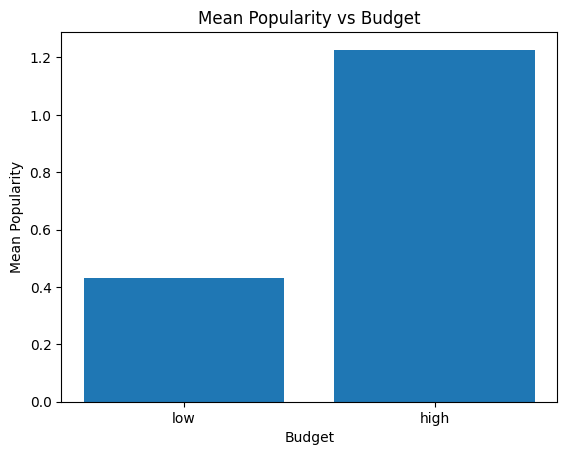

In [41]:
# create a bar chart
locations = [1,2]
heights = [mean_low_budget , mean_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Mean Popularity vs Budget')
plt.xlabel('Budget')
plt.ylabel('Mean Popularity')

In [42]:
increase_percentage = (mean_high_budget - mean_low_budget) / mean_high_budget * 100
increase_percentage

64.89867596270612

Observation:
From the above bar plot we conclude that higher budget movie gains higher popularity. Higher budget movie have mean popularity more than twice than the Mean popularity of lower budget movie.

Do the runtime affect the vote count and popularity?



In [43]:
# There 3 groups with query().  <60 min: lowest   , 60 min <=  <= - 120 min: medium ,  >120 min: highest
lowest =  df.query('runtime < {}'.format(100))
med =  df.query('runtime < {}'.format(200))
highest = df.query('runtime > {}'.format(200))

In [44]:
# check mean popularity of different movie lengths
mean_of_lowest = lowest['popularity'].mean()
mean_of_med = med['popularity'].mean()
mean_of_highest = highest['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

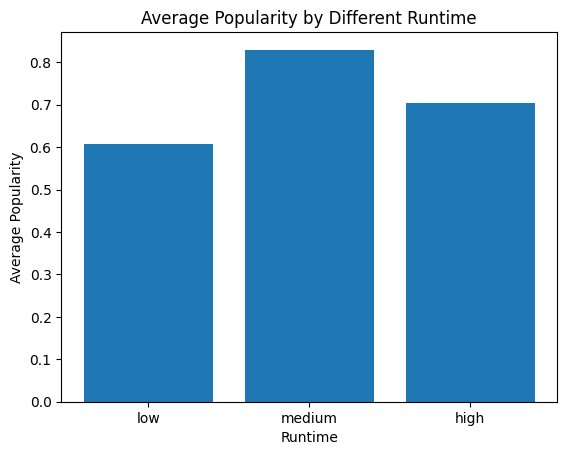

In [45]:
locations = [1,2,3]
heights = [mean_of_lowest, mean_of_med, mean_of_highest]
labels=['low','medium','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

Text(0, 0.5, 'popularity')

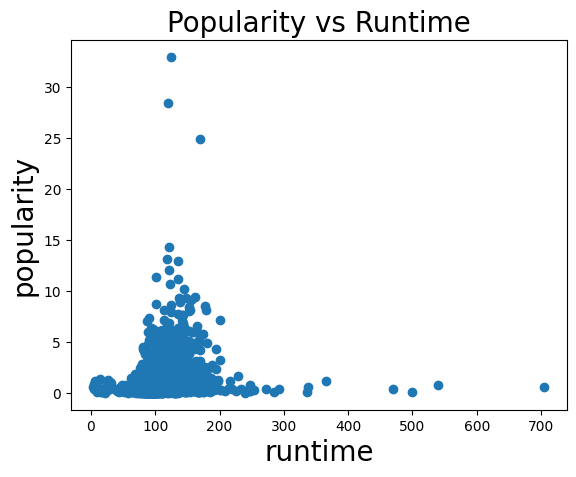

In [65]:
# scatter plot between runtime and popularity
x = df['runtime']
y = df['popularity']

plt.scatter(x,y)

plt.title('Popularity vs Runtime',fontsize=20)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('popularity',fontsize=20)

Observation:
From the above two plots, we can simply say that
If the movies are within 200 minutes,it will be more popular.
Once the movies run over 200 minutes, it's hard for them to gain high popularity

Is Higher popularity means higher profits ?



In [66]:
# calculation for the mean of popularity
mean = df['popularity'].median()
lowest_popularity =  df.query('popularity < {}'.format(mean))
more_popularity =  df.query('popularity >= {}'.format(mean))

In [68]:
# create a new column called profit.
df['profit'] = df['revenue'] - df['budget']

In [69]:
mean_profit_of_low = 0
mean_profit_of_high = 0

if 'profit' in lowest_popularity.columns:
    mean_profit_of_low = lowest_popularity['profit'].mean()

if 'profit' in more_popularity.columns:
    mean_profit_of_high = more_popularity['profit'].mean()

Text(0, 0.5, 'Average Profit')

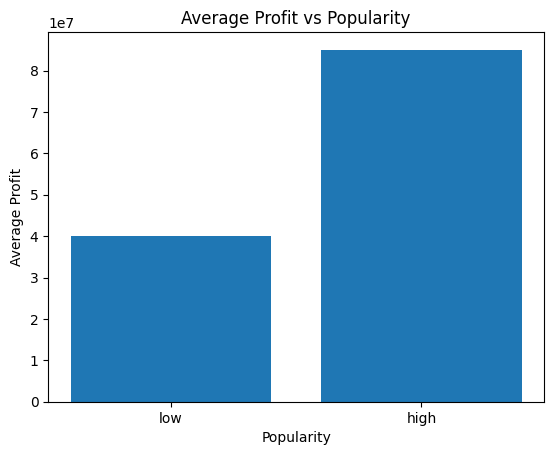

In [70]:
# create a bar chart with the values we get above
locations = [1,2]
heights = [mean_profit_of_low, mean_profit_of_high]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Profit vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

Observation:
From the above graph we observe that higher popularity leads to more Average profit.

What are the Features Associate with Top 10 Revenue Movies ?



array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>,
        <Axes: title={'center': 'revenue_adj'}>],
       [<Axes: title={'center': 'profit'}>, <Axes: >, <Axes: >]],
      dtype=object)

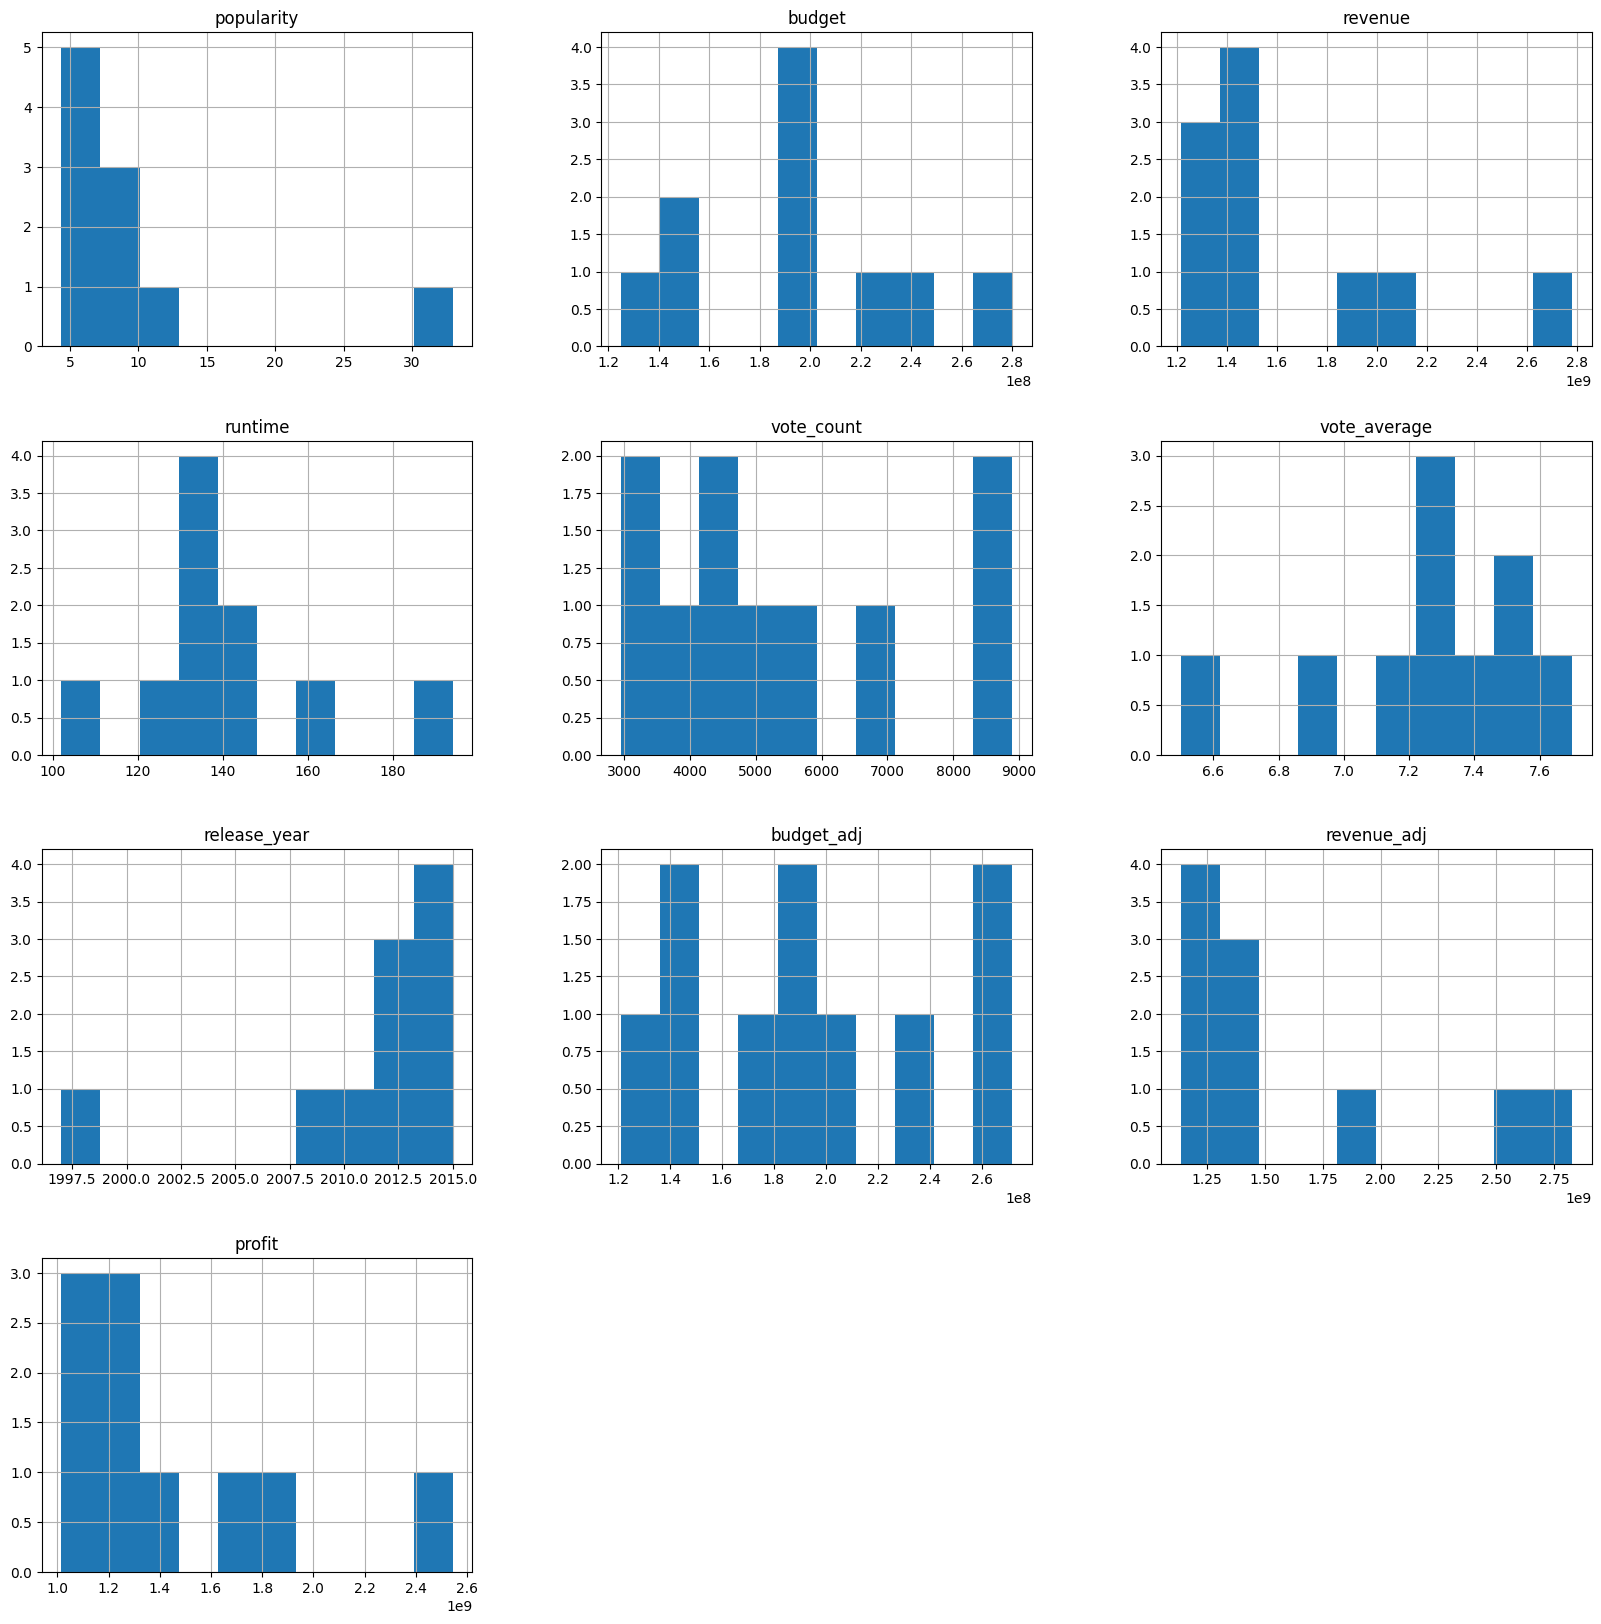

In [71]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(20,20))

Observation:
From the above plot we conclude that Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015 leads to top 10 revenue movies.

CONCLUSION
- Higher budget movie gains higher popularity. Higher budget movie have Mean popularity more than twice than the Mean popularity of lower budget movie.
- If the movies are within 200 minutes,it will be more popular. Once the movies run over 200 minutes, it's hard for them to gain high popularity.
- Higher popularity leads to more Average profit.
- Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015 leads to top 10 revenue movies.

LIMITATIONS
- There are plenty of missing data and many zeros which effect the data analysis process.

- Its very difficult to know how the measurement should be done for coloumn like vote_counts and popularity.

- For movies outside the country currency is not indicated. So its also effect the data analysis process.

REFERENCE
- I mainly watch instructor video to know the data analysis process after watching video i follow the same steps.

- I have also paid account of Data Camp. So i also refer some steps from there.

